In [1]:
# 1. tensorflow.keras의 dataset에서 fashion_mnist 데이터 준비
# 2. 데이터 확인 ( 이미지 화면에 표시, 데이터 구조 확인 )
# 3. 모델 구조 설계
# 4. 모델 학습 설계
# 5. 학습 실행
# 6. 평가
# 7. 기타 (예측, ...)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [3]:
# 데이터 준비
(X_train, y_train), (X_test, y_test) = tf_keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28) (60000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


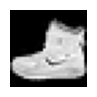

In [4]:
# 데이터 확인

# label_name
# 0 T-shirt/top, 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot

print(X_train.shape, y_train.shape)
print(np.unique(y_train, return_counts=True))

plt.figure(figsize=(1, 1))
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

In [5]:
# 데이터 전처리
flattened_X_train = X_train.reshape(-1, 784) # 2차원 입력을 1차원 입력으로 변경
flattened_X_test = X_test.reshape(-1, 784)

print(flattened_X_train.shape)

(60000, 784)


In [6]:
# 모델 구조 설계

model = tf_keras.models.Sequential()
model.add(tf_keras.layers.Input(shape=(784, )))
model.add(tf_keras.layers.Dense(512, activation='relu'))
model.add(tf_keras.layers.Dense(256, activation='relu'))
model.add(tf_keras.layers.Dense(128, activation='relu'))
model.add(tf_keras.layers.Dense(10, activation='softmax')) # 출력층

In [7]:
# 모델 학습 설계

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.fit(flattened_X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6767 - loss: 12.3083 - val_accuracy: 0.8171 - val_loss: 0.7867
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8205 - loss: 0.6651 - val_accuracy: 0.8360 - val_loss: 0.5535
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - loss: 0.4554 - val_accuracy: 0.8390 - val_loss: 0.4972
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8620 - loss: 0.4034 - val_accuracy: 0.8445 - val_loss: 0.4829
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8738 - loss: 0.3538 - val_accuracy: 0.8590 - val_loss: 0.4360
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8791 - loss: 0.3411 - val_accuracy: 0.8520 - val_loss: 0.4554
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8840 - loss: 0.3198 - val_accuracy: 0.8696 - val_loss: 0.4016
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8902 - loss: 0.3074 - val_accuracy: 0

In [9]:
# 모델 평가

model.evaluate(flattened_X_train, y_train), model.evaluate(flattened_X_test, y_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8770 - loss: 0.3291
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8386 - loss: 0.4788


([0.3528550863265991, 0.8719499707221985],
 [0.47700855135917664, 0.8424000144004822])

In [10]:
# 예측 실험

predicted_value = model.predict(flattened_X_test[:1])
print(predicted_value)
print(np.argmax(predicted_value))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
[[5.6493721e-10 4.7655995e-08 1.2985579e-08 2.1135886e-08 6.7490402e-11
  1.3963277e-03 1.3459982e-07 7.1009748e-02 2.0406110e-06 9.2759174e-01]]
9


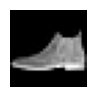

In [11]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[0], cmap='gray')
plt.axis('off')
plt.show()

# 모델 구조 설계 2번

In [12]:
# 모델 구조 설계 2

model2 = tf_keras.models.Sequential()
model2.add(tf_keras.layers.Input(shape=(28, 28)))
model2.add(tf_keras.layers.Flatten()) # (28, 28) --> (784, )로 바꾸는게 flatten의 역할
model2.add(tf_keras.layers.Dense(512, activation='relu'))
model2.add(tf_keras.layers.Dense(256, activation='relu'))
model2.add(tf_keras.layers.Dense(128, activation='relu'))
model2.add(tf_keras.layers.Dense(10, activation='softmax')) # 출력층

In [13]:
# 모델 학습 설계 2

# model2.compile(loss='sparse_categorical_crossentropy',
#                optimizer='adam',
#                metrics=['accuracy'])

model2.compile(loss='sparse_categorical_crossentropy',
               optimizer = tf_keras.optimizers.Adam(learning_rate=0.0001), # learning_rate 조정 (기본값:0.001)
               metrics=['accuracy'])

In [14]:
# model2.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2) # 28, 28이 들어가서 784로 바뀜

# fit_history = model2.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)
# fit_history를 활용해 학습된 로그를 반환

fit_history = model2.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)
# learning_rate 줄이면 epoch 늘려야 함. (학습률을 줄인다는 것은 진폭을 줄여 천천히 가는 것. 그러므로 이런 경우 epoch늘려)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6340 - loss: 11.0972 - val_accuracy: 0.7763 - val_loss: 2.2132
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7987 - loss: 1.6526 - val_accuracy: 0.8083 - val_loss: 1.3814
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8264 - loss: 1.0951 - val_accuracy: 0.8156 - val_loss: 1.1771
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8430 - loss: 0.8436 - val_accuracy: 0.8242 - val_loss: 0.9969
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8570 - loss: 0.6506 - val_accuracy: 0.8233 - val_loss: 1.0302
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8623 - loss: 0.5848 - val_accuracy: 0.8349 - val_loss: 0.8137
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8745 - loss: 0.4711 - val_accuracy: 0.8411 - val_loss: 0.7866
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8837 - loss: 0.4134 - val_accuracy: 0

In [15]:
# 모델 평가 2

model2.evaluate(X_train, y_train), model2.evaluate(X_test, y_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9357 - loss: 0.1923
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8516 - loss: 0.7259


([0.2781141996383667, 0.921500027179718],
 [0.7005462646484375, 0.8522999882698059])

In [16]:
model.summary()
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,702,304 (6.49 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,134,870 (4.33 MB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,702,304 (6.49 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,134,870 (4.33 MB)

In [17]:
# 예측 실험

predicted_value2 = model2.predict(X_test[:1])
print(predicted_value2)
print(np.argmax(predicted_value2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
[[6.1963202e-24 1.5105436e-21 7.2335323e-20 5.4843558e-26 9.3867907e-17
  1.9025557e-09 2.9998931e-22 3.7328828e-05 4.6260427e-21 9.9996269e-01]]
9


# fit_history 활용

In [18]:
# type(fit_history)
print( fit_history.history.keys() )
print( fit_history.epoch )
print( fit_history.params )

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
{'verbose': 'auto', 'epochs': 20, 'steps': 375}


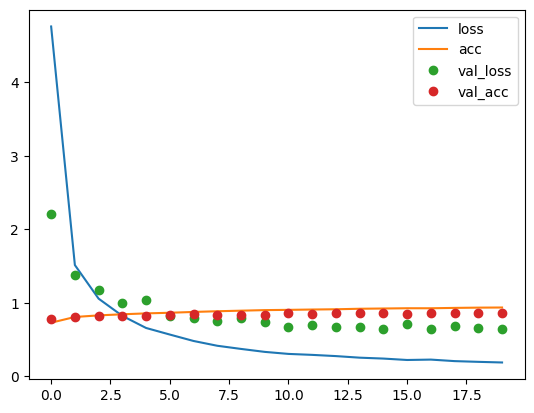

In [19]:
plt.plot(fit_history.epoch, fit_history.history['loss'], label='loss')
plt.plot(fit_history.epoch, fit_history.history['accuracy'], label='acc')

plt.plot(fit_history.epoch, fit_history.history['val_loss'], 'o', label='val_loss')
plt.plot(fit_history.epoch, fit_history.history['val_accuracy'], 'o', label='val_acc')
plt.legend()
plt.show()

# 옵티마이저 learning_rate 줄이고 epoch 늘린 후

In [20]:
# 모델 평가 2

model2.evaluate(X_train, y_train), model2.evaluate(X_test, y_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9357 - loss: 0.1923
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8516 - loss: 0.7259


([0.2781141996383667, 0.921500027179718],
 [0.7005462646484375, 0.8522999882698059])

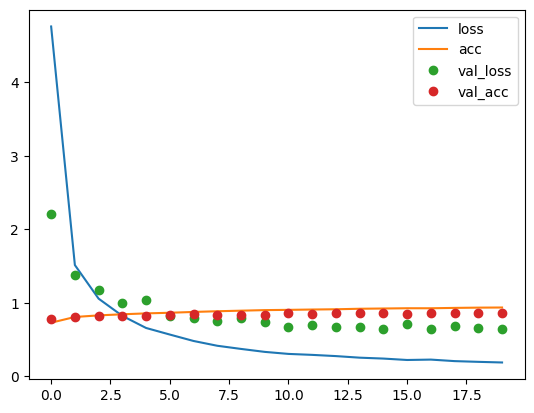

In [21]:
plt.plot(fit_history.epoch, fit_history.history['loss'], label='loss')
plt.plot(fit_history.epoch, fit_history.history['accuracy'], label='acc')

plt.plot(fit_history.epoch, fit_history.history['val_loss'], 'o', label='val_loss')
plt.plot(fit_history.epoch, fit_history.history['val_accuracy'], 'o', label='val_acc')
plt.legend()
plt.show()

# example08 후 모델 개선 시도 (과대적합 방지)

In [24]:
# 모델 개선 시도 - 1. 가중치 초기화
model_wud = tf_keras.models.Sequential()
model_wud.add(tf_keras.layers.Input(shape=(28, 28)))
model_wud.add(tf_keras.layers.Flatten())
model_wud.add(tf_keras.layers.Dense(512, activation='relu', kernel_initializer="he_uniform"))
model_wud.add(tf_keras.layers.Dense(256, activation='relu', kernel_initializer="he_uniform"))
model_wud.add(tf_keras.layers.Dense(128, activation='relu', kernel_initializer="he_uniform"))
model_wud.add(tf_keras.layers.Dense(10, activation='softmax'))

# 모델 개선 시도 - 2. 배치 정규화
model_bn = tf_keras.models.Sequential()
model_bn.add(tf_keras.layers.Input(shape=(28, 28)))
model_bn.add(tf_keras.layers.Flatten())
model_bn.add(tf_keras.layers.Dense(512))
model_bn.add(tf_keras.layers.BatchNormalization())
model_bn.add(tf_keras.layers.Activation('relu'))
model_bn.add(tf_keras.layers.Dense(256))
model_bn.add(tf_keras.layers.BatchNormalization())
model_bn.add(tf_keras.layers.Activation('relu'))
model_bn.add(tf_keras.layers.Dense(128))
model_bn.add(tf_keras.layers.BatchNormalization())
model_bn.add(tf_keras.layers.Activation('relu'))
model_bn.add(tf_keras.layers.Dense(10, activation='softmax'))

# 모델 개선 시도 3 : 가중치 규제 (L1, L2)
model_l = tf_keras.models.Sequential()
model_l.add(tf_keras.layers.Input(shape=(28, 28)))
model_l.add(tf_keras.layers.Flatten())
model_l.add(tf_keras.layers.Dense(512, activation='relu', kernel_regularizer=tf_keras.regularizers.L2(0.1)))
model_l.add(tf_keras.layers.Dense(256, activation='relu', kernel_regularizer=tf_keras.regularizers.L2(0.1)))
model_l.add(tf_keras.layers.Dense(128, activation='relu', kernel_regularizer=tf_keras.regularizers.L2(0.1)))
model_l.add(tf_keras.layers.Dense(10, activation='softmax'))

# 모델 개선 시도 4 : 드롭아웃 적용
model_do = tf_keras.models.Sequential()
model_do.add(tf_keras.layers.Input(shape=(28, 28)))
model_do.add(tf_keras.layers.Flatten())
model_do.add(tf_keras.layers.Dense(512, activation='relu'))
model_do.add(tf_keras.layers.Dropout(0.5, seed=42))
model_do.add(tf_keras.layers.Dense(256, activation='relu'))
model_do.add(tf_keras.layers.Dropout(0.5, seed=42))
model_do.add(tf_keras.layers.Dense(128, activation='relu'))
model_do.add(tf_keras.layers.Dropout(0.5, seed=42))
model_do.add(tf_keras.layers.Dense(10, activation='softmax'))

In [25]:
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

model_wud.compile( loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

model_bn.compile( loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

model_l.compile( loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

model_do.compile( loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [26]:
# 모델 훈련
fit_history_base = model2.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)
fit_history_wud = model_wud.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)
fit_history_bn = model_bn.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)
fit_history_l = model_l.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)
fit_history_do = model_do.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7648 - loss: 1.9005 - val_accuracy: 0.8208 - val_loss: 0.5469
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8476 - loss: 0.4489 - val_accuracy: 0.8468 - val_loss: 0.4693
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8650 - loss: 0.3766 - val_accuracy: 0.8592 - val_loss: 0.4148
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8735 - loss: 0.3461 - val_accuracy: 0.8537 - val_loss: 0.4364
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8847 - loss: 0.3176 - val_accuracy: 0.8507 - val_loss: 0.4296
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8854 - loss: 0.3125 - val_accuracy: 0.8611 - val_loss: 0.4049
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - loss: 0.3011 - val_accuracy: 0.8643 - val_loss: 0.4240
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8893 - loss: 0.3050 - val_accuracy: 0.

In [27]:
# 모델 평가
print( model2.evaluate(X_train, y_train), model2.evaluate(X_test, y_test) )       # 0.9140499830245972, 0.8744000196456909
print( model_wud.evaluate(X_train, y_train), model_wud.evaluate(X_test, y_test) ) # 0.8970833420753479, 0.8658000230789185
print( model_bn.evaluate(X_train, y_train), model_bn.evaluate(X_test, y_test) )   # 0.9412333369255066, 0.8824999928474426
print( model_l.evaluate(X_train, y_train), model_l.evaluate(X_test, y_test) )     # 0.8417500257492065, 0.8314999938011169
print( model_do.evaluate(X_train, y_train), model_do.evaluate(X_test, y_test) )   # 0.7468500137329102, 0.7328000068664551

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9206 - loss: 0.2139
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8731 - loss: 0.3788
[0.2385699450969696, 0.9140499830245972] [0.373791366815567, 0.8744000196456909]
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9021 - loss: 0.2764
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8656 - loss: 0.4437
[0.30174893140792847, 0.8970833420753479] [0.4475840926170349, 0.8658000230789185]
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9550 - loss: 0.1262
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8840 - loss: 0.4649
[0.18738752603530884, 0.9412333369255066] [0.46422362327575684, 0.8824999928474426]
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8429 - loss: 0.6335
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8331 - loss: 0.6697
[0.6386808753013611, 0.8417500257492065] [0.6730663180351257, 0.8314999938011169]
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7496 